In [1]:
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# LOAD IMAGE


In [3]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    plt.show()
    return img

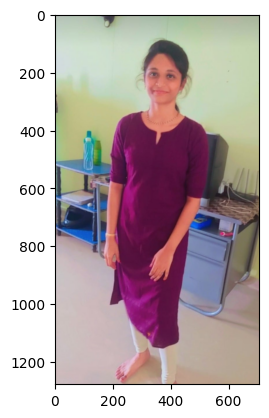

In [4]:
filename = "ni.jpg"
img = read_file(filename)

org=np.copy(img)

# create edge mark


In [5]:
def edge_mask(img , line_size,blur_value):
    
    
    """
    input: inputimage
    output: edges of images
    """
    gray=cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C ,
                                  cv2.THRESH_BINARY,line_size ,blur_value)
    return edges    


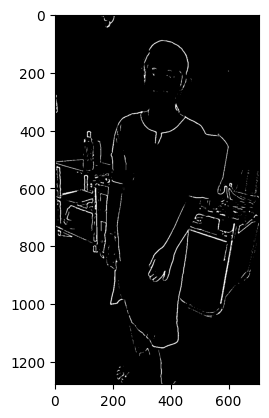

In [6]:
line_size, blur_value = 7,7
edges= edge_mask(img , line_size, blur_value)

plt.imshow(edges, cmap="binary") #gray
plt.show()

# reduce color palette

In [7]:
def color_quantization(img , k):
    
    data= np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    
    ret , label , center = cv2.kmeans(data , k , None , criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result= center[label.flatten()]
    result = result.reshape(img.shape)
    return result

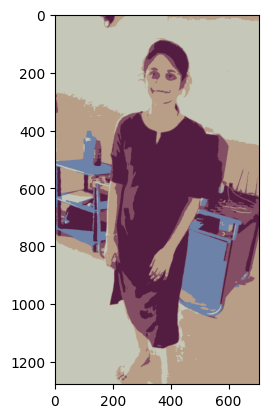

In [8]:
img =  color_quantization(img , k=5)

plt.imshow(img)
plt.show()

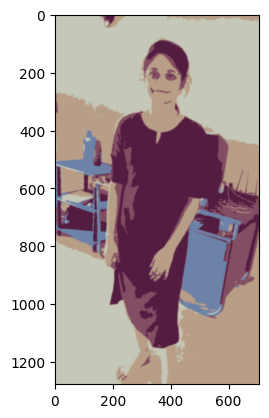

In [9]:
# reduce the noise 

blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

# combine edge mask with quantiz img

In [10]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask=edges)
    
    plt.imshow(org)
    plt.show()
    
    plt.imshow(c)
    plt.show()

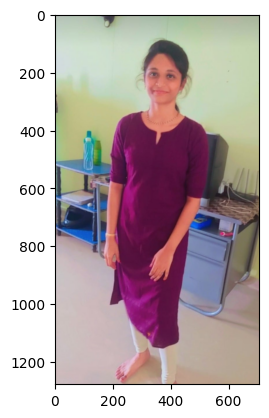

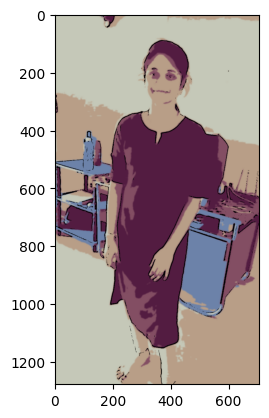

In [11]:
cartoon()